Régression logistique (classification des fleurs d’iris) 

La régression logistique s’agit de modéliser une variable cible qualitative binaire en fonction d'une ou plusieurs caractéristiques indépendantes. Contrairement à la régression linéaire, la régression logistique ne prédit pas directement une valeur continue, mais plutôt la probabilité qu'un événement appartienne à une classe donnée.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [18]:
iris = datasets.load_iris()

Sachant que le dataset Iris se compose de quatre features (variables explicatives), on n’utilisera que les deux premières features à savoir: Sepal_length et Sepal_width.

In [19]:
X = iris.data[:, :2] 
y = iris.target

Également, le jeu IRIS se compose de trois classes, les étiquettes peuvent donc
appartenir à l’ensemble {0, 1, 2}. 

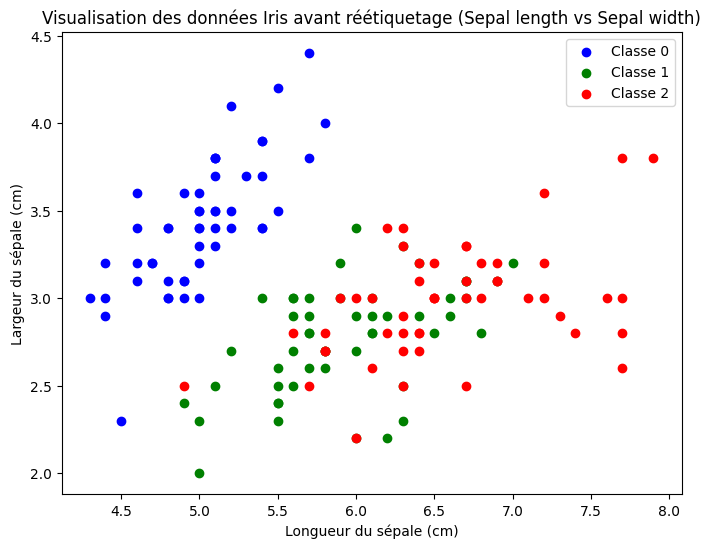

In [20]:
# Visualiser les données avant réétiquetage
plt.figure(figsize=(8, 6))

# Tracer les points pour chaque classe (0, 1, et 2)
plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Classe 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='green', label='Classe 1')
plt.scatter(X[y == 2][:, 0], X[y == 2][:, 1], color='red', label='Classe 2')

plt.title("Visualisation des données Iris avant réétiquetage (Sepal length vs Sepal width)")
plt.xlabel("Longueur du sépale (cm)")
plt.ylabel("Largeur du sépale (cm)")
plt.legend()
plt.show()

Puisque la régression logistique est un algorithme de classification binaire, on va re-étiqueter les fleurs ayant le label 1 et 2 avec le label 1. Ainsi, on se retrouve avec un problème de classification binaire. 

In [21]:
y_binary = (iris.target != 0) * 1

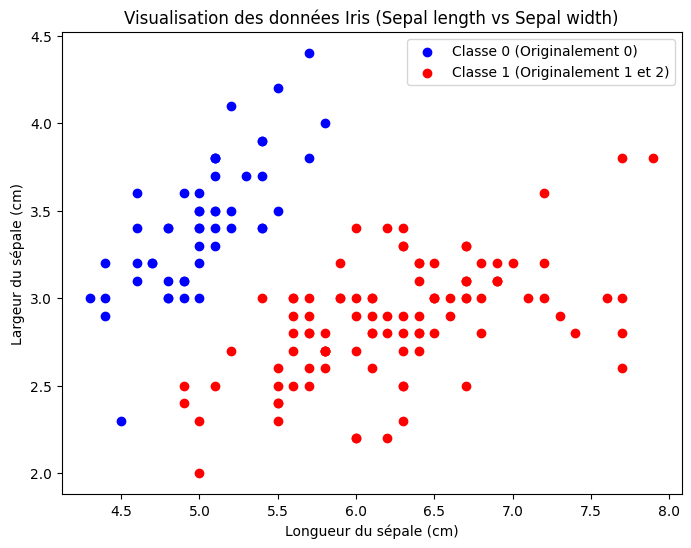

In [22]:
# Visualiser les données
plt.figure(figsize=(8, 6))

plt.scatter(X[y_binary == 0][:, 0], X[y_binary == 0][:, 1], color='blue', label='Classe 0 (Originalement 0)')
plt.scatter(X[y_binary == 1][:, 0], X[y_binary == 1][:, 1], color='red', label='Classe 1 (Originalement 1 et 2)')

plt.title("Visualisation des données Iris (Sepal length vs Sepal width)")
plt.xlabel("Longueur du sépale (cm)")
plt.ylabel("Largeur du sépale (cm)")
plt.legend()
plt.show()

=> Moins de confusion

In [23]:
X_train,X_test,Y_train,Y_test=train_test_split(X,y_binary,test_size=0.25,random_state=0)
# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

In [24]:
## TRAIN
model_binary = LogisticRegression(C=1e20)
model_binary.fit(X_train,Y_train)
prediction=model_binary.predict(X_test)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,Y_test))

The accuracy of the Logistic Regression is 0.9736842105263158


In [25]:
test_flowers = np.array([[5.5, 2.5], [7, 3], [3, 2], [5, 3]])
prediction = model_binary.predict(test_flowers)
prediction

array([1, 1, 0, 0])

Comme le modèle a bien prédit nos fleurs de test, on peut maintenant ajouter un 2eme filtre pour prédire la classe originale d'une observation dans le cas où elle est classée de classe 1.

In [26]:
X_second = X[iris.target != 0]
y_second = iris.target[iris.target != 0] 

In [ ]:
model_second = LogisticRegression(C=1e20)
model_second.fit(X_second, y_second)

In [28]:
def predict_with_second_filter(X_new):
    # Premier modèle
    binary_prediction = model_binary.predict(X_new)
    final_predictions = []
    for i, pred in enumerate(binary_prediction):
        if pred == 1:
            # Appliquer le second modèle
            final_predictions.append(model_second.predict(X_new[i].reshape(1, -1))[0])
        else:
            final_predictions.append(0)
    return np.array(final_predictions)

In [30]:
new_flowers = np.array([[5.5, 2.5], [7, 3], [3, 2], [5, 3]])
final_predictions = predict_with_second_filter(new_flowers)
final_predictions

array([1, 2, 0, 0])